
title: "Bellabeat Smart Device Data Analysis"

author: "Isabelle"

Purpose: Analyse smart device usage data to inform Bellabeat's marketing strategy

Date: July 18,2024

## Scenario

I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will help guide marketing strategy for the company. I will present my analysis to the Bellabeat executive team along with high-level recommendations for Bellabeat’s marketing strategy.

## About the Company

Founded in 2013 by Urška Sršen and Sando Mur, Bellabeat is a high-tech company that manufactures health-focused smart products. The company quickly positioned itself as a tech-driven wellness company for women, offering products available through online retailers and their e-commerce channel. Bellabeat focuses extensively on digital marketing and engages consumers across various social media platforms.

## Tools Used

- Microsoft Excel and queries
- R

## Deliverables

I will produce a report with the following deliverables:

1. A clear summary of the business task.
2. A description of all data sources used.
3. Documentation of any cleaning or manipulation of data.
4. A summary of my analysis.
5. Supporting visualizations and key findings.

## Merging Datasets with Microsoft Excel and Queries

I used Microsoft Excel and Queries to merge the datasets `hourlyCalories`, `hourlyIntensities`, and `hourlySteps` into a single dataset named `hourlyActivity`. This approach was chosen because the data is large and contains strings with different formats in the Time column, which made it difficult to import and clean in Google BigQuery. Therefore, I opted to use this method for merging. 

I will use R for further data cleaning and data mining.


### Steps:

1. **Import Files**:
   - Import the three files into Microsoft Excel.
  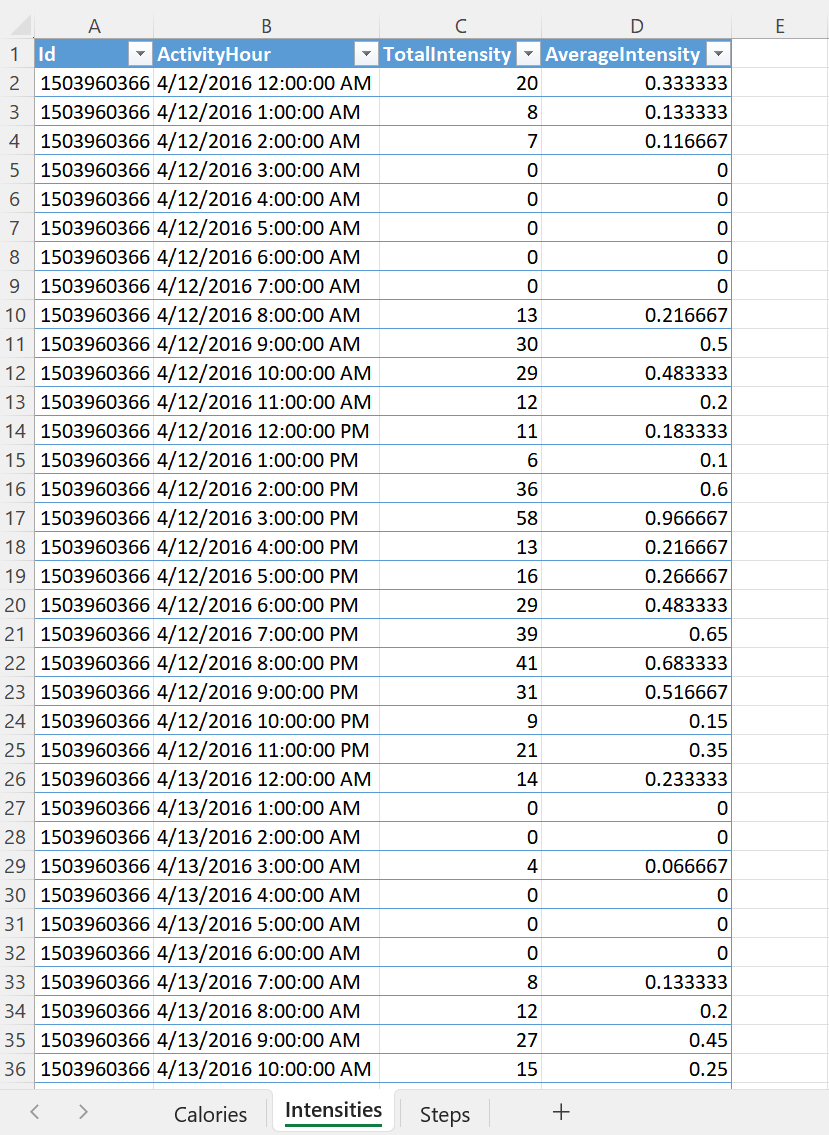 
  
2. **Merge Datasets**:
   - Go to the menu and select `Queries` > `Merge`.
   - In the Merge dialog:
     1. **Select Columns**:
        - First, choose the first file and select the `id` column.
        - Then, `Ctrl + Click` to select the `id` column in the second file.
 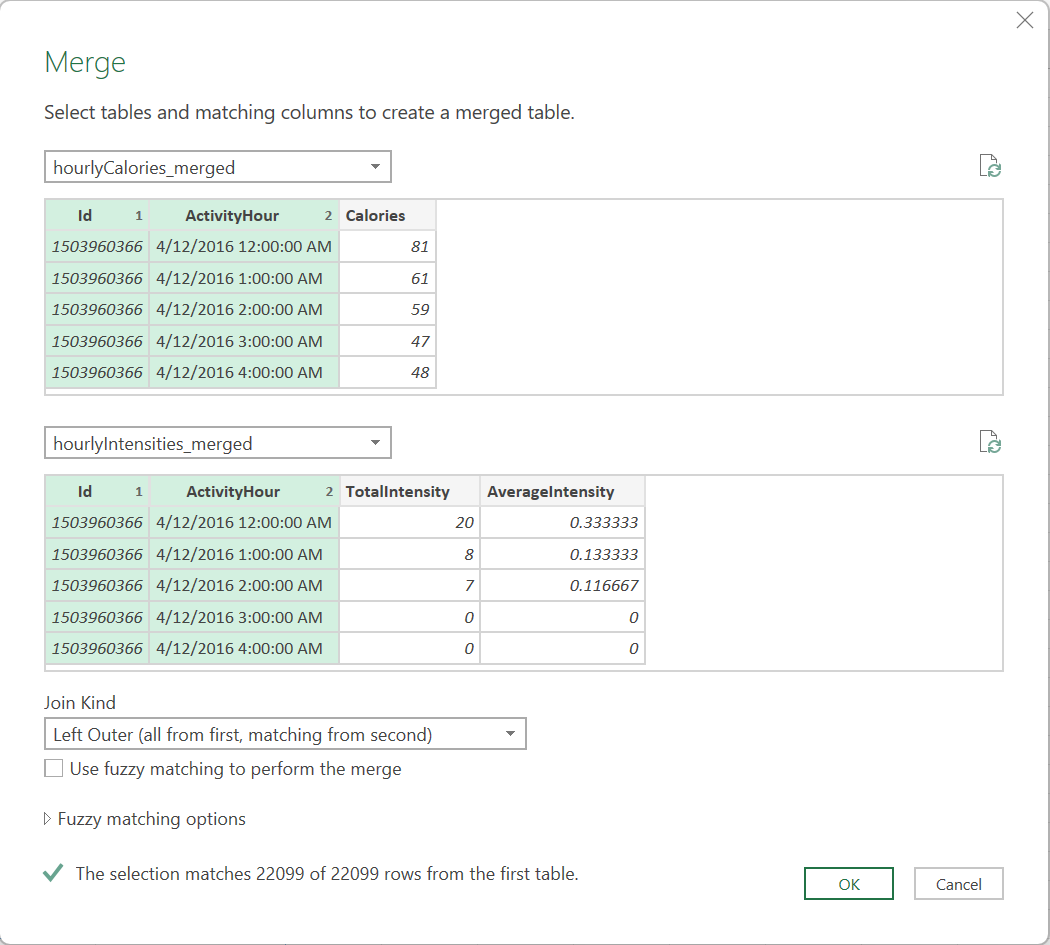 
 
 3. **Operate According to the Image**:

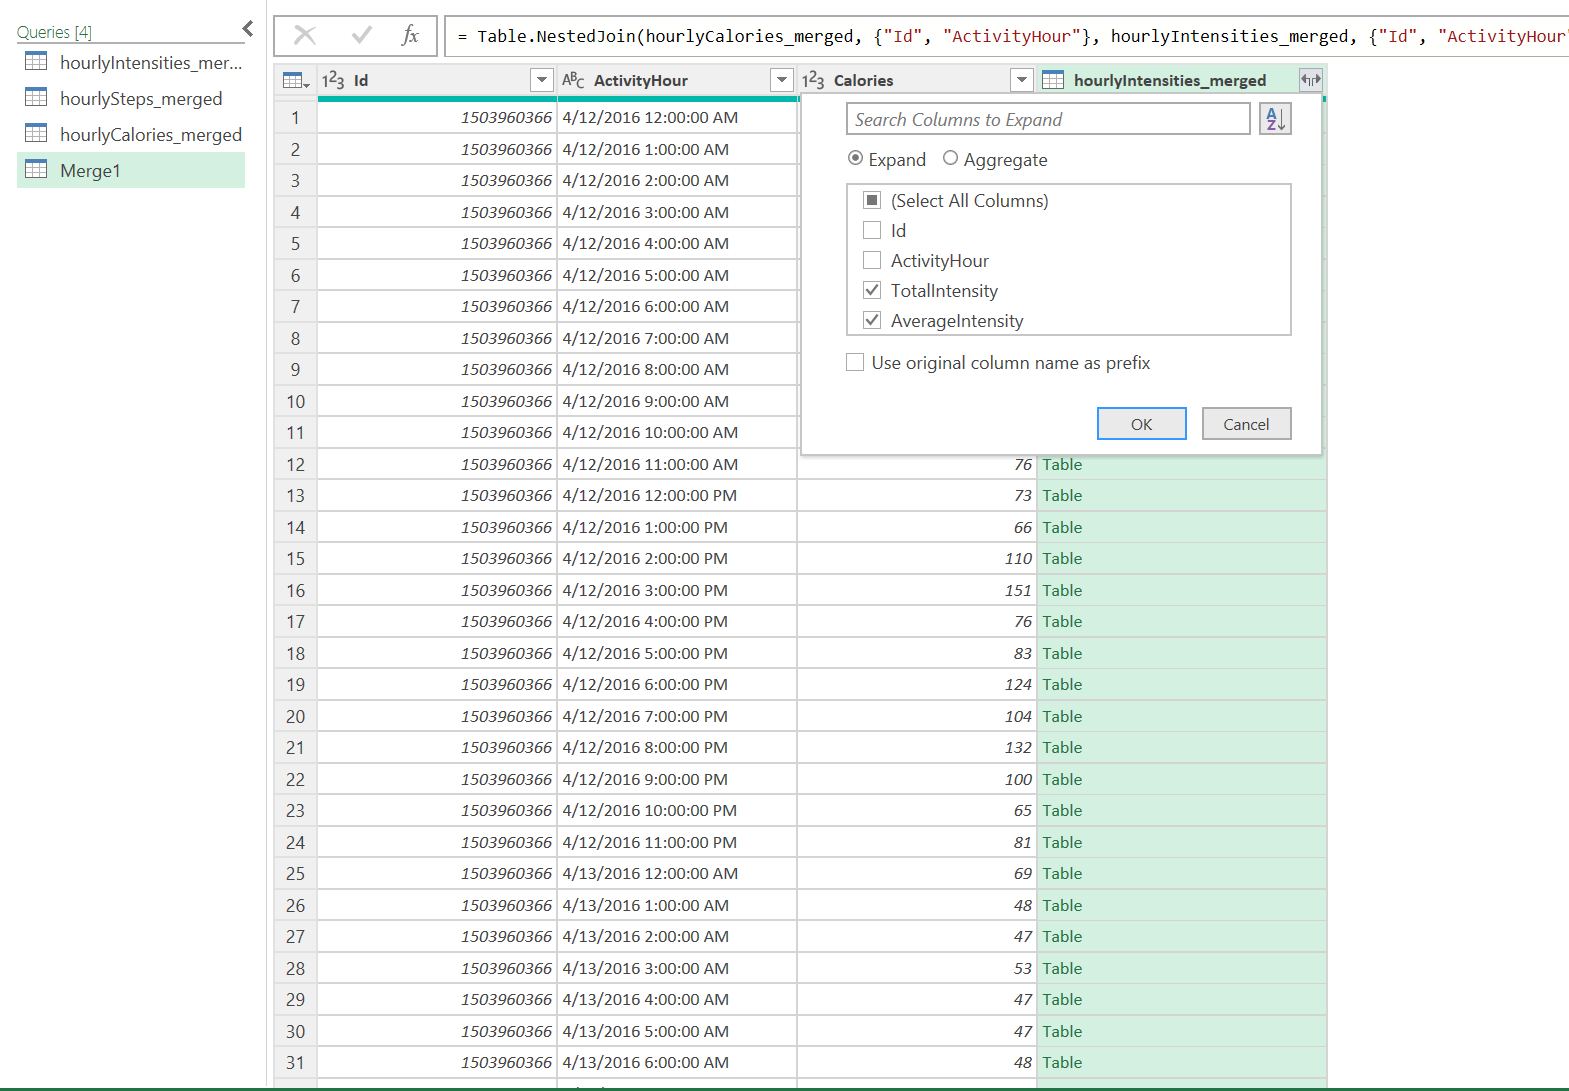
    
  4. **Repeat for Remaining Files**:
        - Click on the top menu `Queries` to continue the merge process for any remaining files.
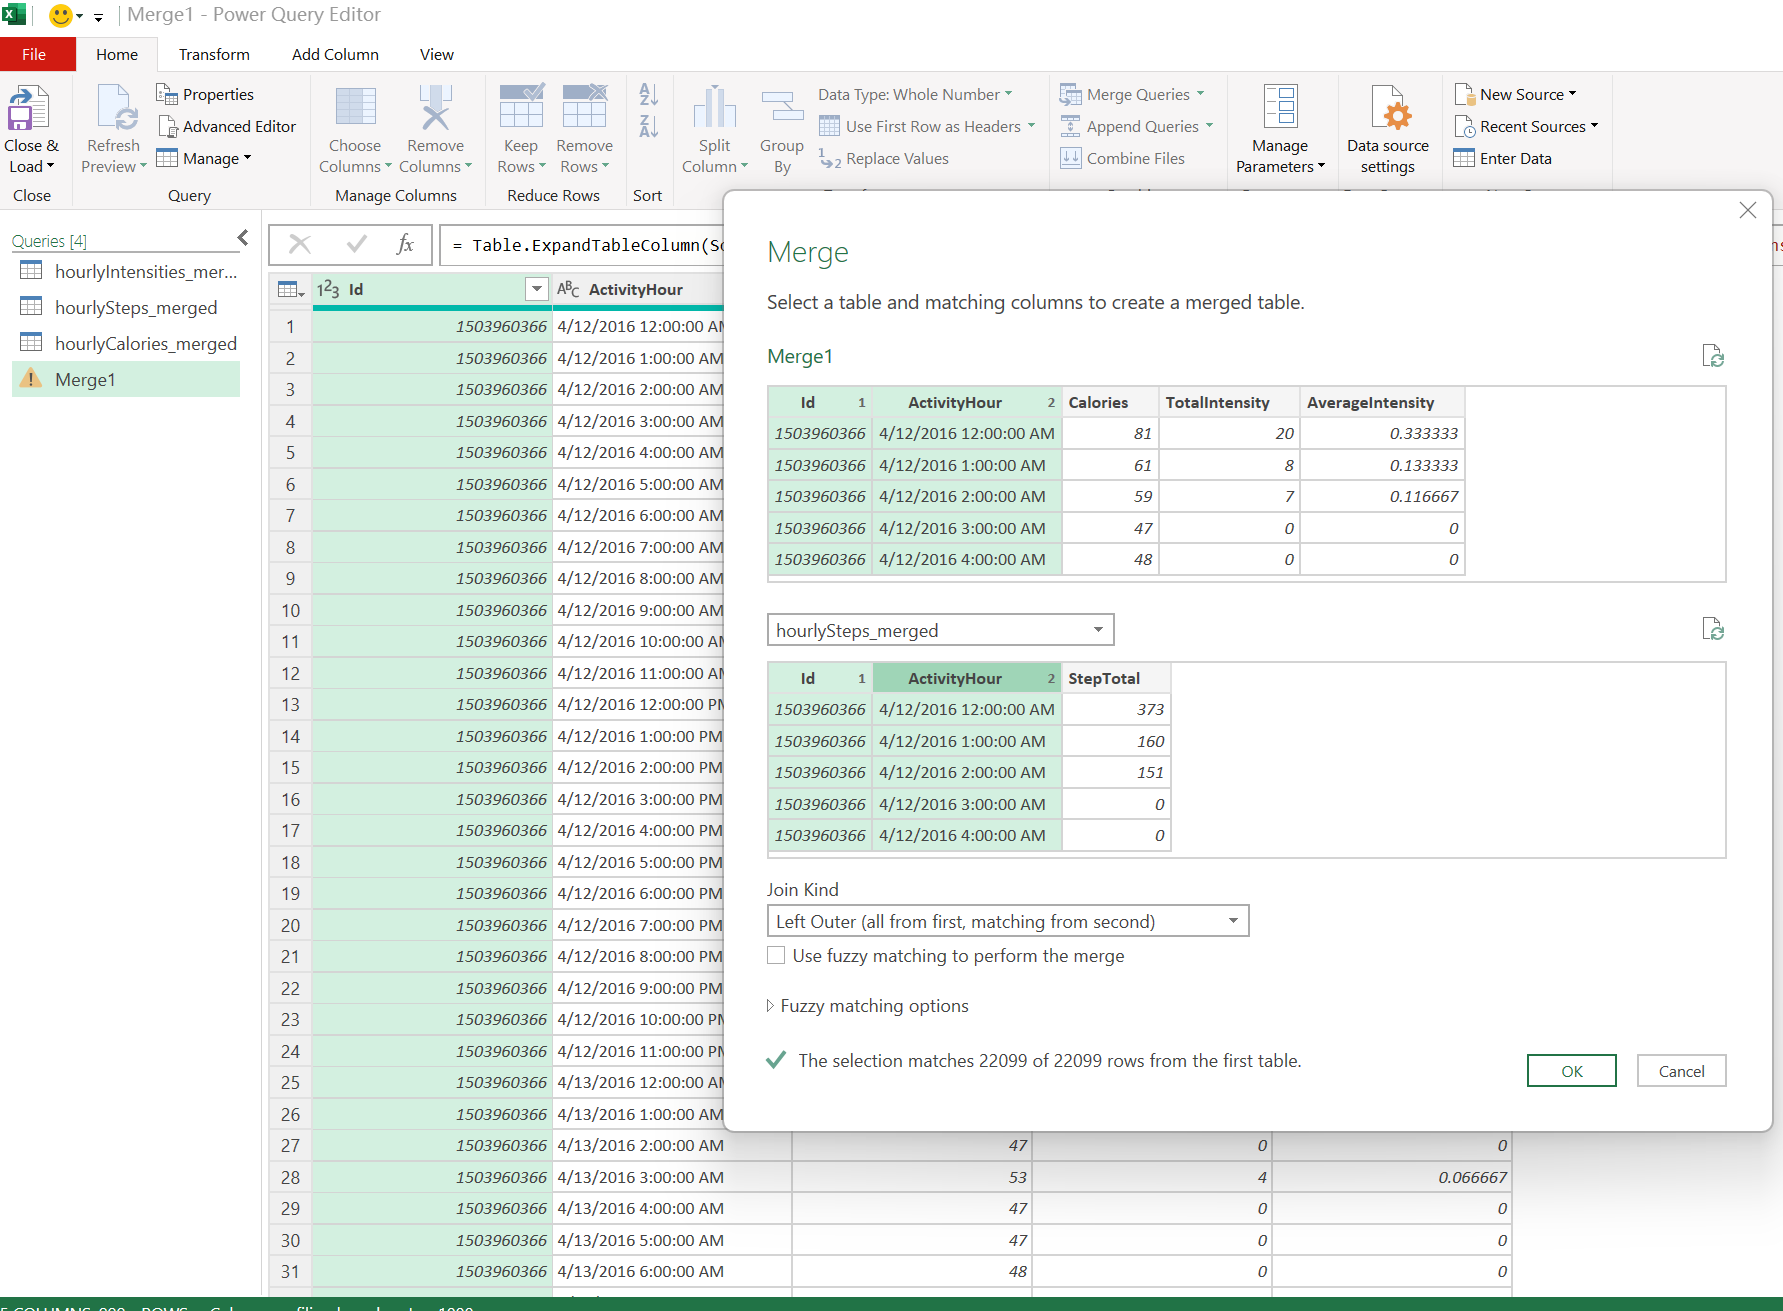
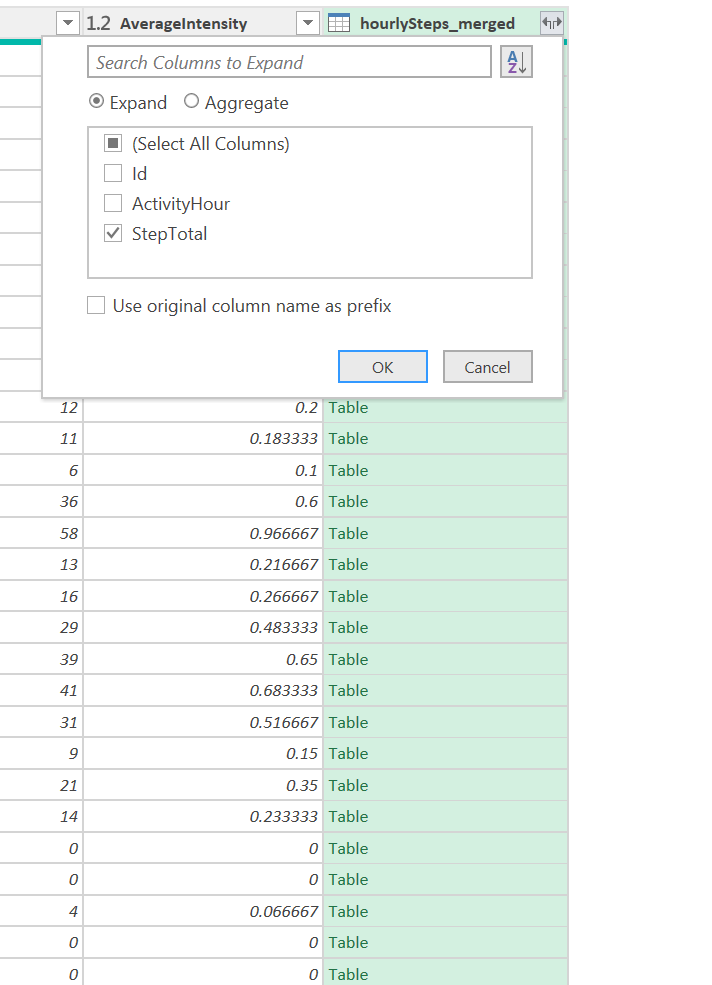
        
 5. **Load Data**:
   - After merging all required files, click on the top left corner `Load` button.
   - The combined information will be displayed in an Excel sheet.








In [ ]:
# Import the data from FitBit Fitness Tracker Dataset:

## Files: dailyActivity；heartrate_seconds; hourlyActivity; minuteMETsNarrow; minuteSleep; sleepDay; weightLogInfo

### Define file paths

file_used <- list(
  dailyActivity = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv",
  heartrate_seconds = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv",
  minuteMETsNarrow = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv",
  minuteSleep = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv",
  sleepDay = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv",
  weightLogInfo = "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv",
  hourlyActivity = "/kaggle/input/files-used/hourlyActivity.xlsx"
)

#### Load datasets into a list named period2

library(readxl)
library(readr)

period2 <- lapply(file_used, function(file) {
  if (grepl("\\.csv$", file)) {
    read_csv(file)
  } else if (grepl("\\.xlsx$", file)) {
    read_excel(file)
  }
})

##### View the `hourlyActivity` and `heartrate_seconds` dataset as examples

head(period2$hourlyActivity)
str(period2$hourlyActivity)

head(period2$heartrate_seconds)
str(period2$heartrate_seconds)

##### View all datasets
head(period2$dailyActivity)
str(period2$dailyActivity)

head(period2$minuteMETsNarrow)
str(period2$minuteMETsNarrow)

head(period2$minuteSleep)
str(period2$minuteSleep)

head(period2$sleepDay)
str(period2$sleepDay)

head(period2$weightLogInfo)
str(period2$weightLogInfo)

**Preliminary Observations**

- The time format in both `hourlyActivity` and `heartrate_seconds` datasets is inconsistent and is stored as a string, requiring further conversion.

**Data Cleaning**:

*Based on the structure and characteristics of the datasets viewed earlier, I have identified the following issues:

**1. Inconsistent Time Formats**

The time columns (ActivityDate, Time, ActivityMinute, date, SleepDay, Date, ActivityHour) are all character type chr and need to be converted for time series analysis.

**2. Handling Missing Values**

Some datasets contain missing values that need to be addressed. For example: The Fat column in weightLogInfo contains missing values (NA).

**3. Duplicate Data**


**4. Outlier Detection**
    

In [ ]:
# Convert date-time formats
library(lubridate)

period2$dailyActivity$ActivityDate <- mdy(period2$dailyActivity$ActivityDate)
period2$heartrate_seconds$Time <- mdy_hms(period2$heartrate_seconds$Time, tz = "UTC")
period2$minuteMETsNarrow$ActivityMinute <- mdy_hms(period2$minuteMETsNarrow$ActivityMinute, tz = "UTC")
period2$minuteSleep$date <- mdy_hms(period2$minuteSleep$date, tz = "UTC")
period2$sleepDay$SleepDay <- mdy_hms(period2$sleepDay$SleepDay, tz = "UTC")
period2$weightLogInfo$Date <- mdy_hms(period2$weightLogInfo$Date, tz = "UTC")
period2$hourlyActivity$ActivityHour <- mdy_hms(period2$hourlyActivity$ActivityHour, tz = "UTC")

# View the structure of the converted datasets
str(period2$dailyActivity)
str(period2$heartrate_seconds)
str(period2$minuteMETsNarrow)
str(period2$minuteSleep)
str(period2$sleepDay)
str(period2$weightLogInfo)
str(period2$hourlyActivity)

In [ ]:
# Check for missing values using naniar
library(naniar)

# Use the miss_var_summary function to summarize missing values
miss_var_summary(period2$dailyActivity)
miss_var_summary(period2$heartrate_seconds)
miss_var_summary(period2$weightLogInfo)
miss_var_summary(period2$minuteMETsNarrow)
miss_var_summary(period2$minuteSleep)
miss_var_summary(period2$sleepDay)
miss_var_summary(period2$hourlyActivity)

**Conclusion on Missing Values**

Except for the weightLogInfo dataset, the other datasets have no significant missing values and do not require further processing.

In [ ]:
# Load necessary library
library(dplyr)

# Remove the Fat column due to high proportion of missing values
period2$weightLogInfo <- period2$weightLogInfo %>% select(-Fat)

# Check the data summary again after removing the Fat column
summary(period2$weightLogInfo)
str(period2$weightLogInfo)

# Check for duplicates in each dataset
duplicates_dailyActivity <- sum(duplicated(period2$dailyActivity))
duplicates_heartrate_seconds <- sum(duplicated(period2$heartrate_seconds))
duplicates_minuteMETsNarrow <- sum(duplicated(period2$minuteMETsNarrow))
duplicates_minuteSleep <- sum(duplicated(period2$minuteSleep))
duplicates_sleepDay <- sum(duplicated(period2$sleepDay))
duplicates_weightLogInfo <- sum(duplicated(period2$weightLogInfo))
duplicates_hourlyActivity <- sum(duplicated(period2$hourlyActivity))

# Print the number of duplicates
cat("Number of duplicates in dailyActivity:", duplicates_dailyActivity, "\n")
cat("Number of duplicates in heartrate_seconds:", duplicates_heartrate_seconds, "\n")
cat("Number of duplicates in minuteMETsNarrow:", duplicates_minuteMETsNarrow, "\n")
cat("Number of duplicates in minuteSleep:", duplicates_minuteSleep, "\n")
cat("Number of duplicates in sleepDay:", duplicates_sleepDay, "\n")
cat("Number of duplicates in weightLogInfo:", duplicates_weightLogInfo, "\n")
cat("Number of duplicates in hourlyActivity:", duplicates_hourlyActivity, "\n")

**The minuteSleep dataset has 543 duplicates, and the sleepDay dataset has 3 duplicates. The next step is to handle these duplicates to ensure accurate analysis.**

In [ ]:
# Check for duplicate data in minuteSleep
duplicates_minuteSleep_data <- period2$minuteSleep[duplicated(period2$minuteSleep) | duplicated(period2$minuteSleep, fromLast = TRUE), ]
head(duplicates_minuteSleep_data)

# Check for duplicate data in sleepDay
duplicates_sleepDay_data <- period2$sleepDay[duplicated(period2$sleepDay) | duplicated(period2$sleepDay, fromLast = TRUE), ]
head(duplicates_sleepDay_data)

In [ ]:
# Remove duplicate records from minuteSleep
period2$minuteSleep <- period2$minuteSleep %>% distinct()

# Remove duplicate records from sleepDay
period2$sleepDay <- period2$sleepDay %>% distinct()

# Check if there are any remaining duplicate records
remaining_duplicates_minuteSleep <- nrow(period2$minuteSleep) - nrow(period2$minuteSleep %>% distinct())
remaining_duplicates_sleepDay <- nrow(period2$sleepDay) - nrow(period2$sleepDay %>% distinct())

cat("Remaining duplicates in minuteSleep:", remaining_duplicates_minuteSleep, "\n")
cat("Remaining duplicates in sleepDay:", remaining_duplicates_sleepDay, "\n")

In [ ]:
# View summary statistics for each dataset
# Detect outliers for each dataset
summary(period2$dailyActivity)
summary(period2$heartrate_seconds)
summary(period2$minuteMETsNarrow)
summary(period2$minuteSleep)
summary(period2$sleepDay)
summary(period2$weightLogInfo)
summary(period2$hourlyActivity)

In [ ]:
library(ggplot2)

# Function to create boxplots for single variable outlier analysis
create_boxplot <- function(data, column_name, plot_title) {
  ggplot(data, aes(x = "Variable", y = .data[[column_name]])) +
    geom_boxplot() +
    ggtitle(plot_title) +
    xlab("") + 
    ylab(column_name)
}

# Create boxplots
boxplot1 <- create_boxplot(period2$dailyActivity, "TotalSteps", "Single Variable Outlier Analysis: TotalSteps")
boxplot2 <- create_boxplot(period2$heartrate_seconds, "Value", "Single Variable Outlier Analysis: Value")
boxplot3 <- create_boxplot(period2$minuteMETsNarrow, "METs", "Single Variable Outlier Analysis: METs")
boxplot4 <- create_boxplot(period2$minuteSleep, "value", "Single Variable Outlier Analysis: minuteSleep Value")
boxplot5 <- create_boxplot(period2$sleepDay, "TotalMinutesAsleep", "Single Variable Outlier Analysis: TotalMinutesAsleep")
boxplot6 <- create_boxplot(period2$weightLogInfo, "WeightKg", "Single Variable Outlier Analysis: WeightKg")
boxplot7 <- create_boxplot(period2$hourlyActivity, "Calories", "Single Variable Outlier Analysis: Calories")

# Print boxplots
print(boxplot1)
print(boxplot2)
print(boxplot3)
print(boxplot4)
print(boxplot5)
print(boxplot6)
print(boxplot7)

**Outlier Analysis Descriptions:**

**1. Total Steps:**
        
  The interquartile range (IQR) for total steps is 5,000-15,000 steps. Most people take around 10,000 steps, but there are outliers with some taking over 20,000 steps and a few beyond 30,000 steps.

**2. minuteSleep Value:**
  
  The IQR for minuteSleep value is 1. Most data points are low, but there are outliers at 2 and 3.

**3. Total Minutes Asleep:**

  The IQR for total minutes asleep is 350-450 minutes. Sleep duration is mostly around 400 minutes (about 6.67 hours), but there are outliers below 200 minutes and above 600 minutes.

**4. Value (Heartrate Seconds):**
        
  The IQR for heart rate is 60-120 beats per minute. Most readings are around 100, but there are outliers with some values going above 150 and up to 200.

**5. METs (Metabolic Equivalent):**
        
   The IQR for METs values is 1-10 METs. Most values are low, but there are outliers above 100.

**6. Weight (Kg):**
        
   The IQR for weight is 61.4-85.05 kg. Most weights are between 60 and 80 kg, but there is an outlier above 120 kg.

**7. Calories:**
        
   The IQR for calorie burns is 50-300 calories. Most calorie burns are below 250, but there are outliers with some values going above 500.

In [ ]:
# Calculate z-scores to identify outliers
calculate_zscores <- function(df, column_name) {
  df[[paste0(column_name, "_zscores")]] <- scale(df[[column_name]])
  return(df)
}

# Calculate z-scores
period2$dailyActivity <- calculate_zscores(period2$dailyActivity, "TotalSteps")
period2$heartrate_seconds <- calculate_zscores(period2$heartrate_seconds, "Value")
period2$minuteMETsNarrow <- calculate_zscores(period2$minuteMETsNarrow, "METs")
period2$minuteSleep <- calculate_zscores(period2$minuteSleep, "value")
period2$sleepDay <- calculate_zscores(period2$sleepDay, "TotalMinutesAsleep")
period2$weightLogInfo <- calculate_zscores(period2$weightLogInfo, "WeightKg")
period2$hourlyActivity <- calculate_zscores(period2$hourlyActivity, "Calories")

# Create data frames with only outliers
dailyActivity_outliers <- period2$dailyActivity[period2$dailyActivity$TotalSteps_zscores > 3 | period2$dailyActivity$TotalSteps_zscores < -3, ]
heartrate_seconds_outliers <- period2$heartrate_seconds[period2$heartrate_seconds$Value_zscores > 3 | period2$heartrate_seconds$Value_zscores < -3, ]
minuteMETsNarrow_outliers <- period2$minuteMETsNarrow[period2$minuteMETsNarrow$METs_zscores > 3 | period2$minuteMETsNarrow$METs_zscores < -3, ]
minuteSleep_outliers <- period2$minuteSleep[period2$minuteSleep$value_zscores > 3 | period2$minuteSleep$value_zscores < -3, ]
sleepDay_outliers <- period2$sleepDay[period2$sleepDay$TotalMinutesAsleep_zscores > 3 | period2$sleepDay$TotalMinutesAsleep_zscores < -3, ]
weightLogInfo_outliers <- period2$weightLogInfo[period2$weightLogInfo$WeightKg_zscores > 3 | period2$weightLogInfo$WeightKg_zscores < -3, ]
hourlyActivity_outliers <- period2$hourlyActivity[period2$hourlyActivity$Calories_zscores > 3 | period2$hourlyActivity$Calories_zscores < -3, ]

# Take a peek at the outliers
head(dailyActivity_outliers)
head(heartrate_seconds_outliers)
head(minuteMETsNarrow_outliers)
head(minuteSleep_outliers)
head(sleepDay_outliers)
head(weightLogInfo_outliers)
head(hourlyActivity_outliers)

In [ ]:
# Outlier Replacement with Median for Multiple Datasets

# This function replaces outliers (defined as values with z-scores > 3 or < -3) 
# with the median value of the respective column. We will apply this function 
# to multiple datasets within the 'period2' list.

# Load necessary libraries
library(dplyr)

# Function to replace outliers with median
replace_outliers_with_median <- function(df, column_name) {
  # Calculate the median value of the column
  median_value <- median(df[[column_name]], na.rm = TRUE)
  # Calculate z-scores for the column
  df[[paste0(column_name, "_zscores")]] <- scale(df[[column_name]])
  # Replace outliers with median value
  df[[column_name]][df[[paste0(column_name, "_zscores")]] > 3 | df[[paste0(column_name, "_zscores")]] < -3] <- median_value
  # Remove the z-scores column
  df <- df %>% select(-matches(paste0(column_name, "_zscores")))
  return(df)
}

# Replace outliers with median in all datasets within the 'period2' list
period2$dailyActivity <- replace_outliers_with_median(period2$dailyActivity, "TotalSteps")
period2$heartrate_seconds <- replace_outliers_with_median(period2$heartrate_seconds, "Value")
period2$minuteMETsNarrow <- replace_outliers_with_median(period2$minuteMETsNarrow, "METs")
period2$minuteSleep <- replace_outliers_with_median(period2$minuteSleep, "value")
period2$sleepDay <- replace_outliers_with_median(period2$sleepDay, "TotalMinutesAsleep")
period2$weightLogInfo <- replace_outliers_with_median(period2$weightLogInfo, "WeightKg")
period2$hourlyActivity <- replace_outliers_with_median(period2$hourlyActivity, "Calories")

# Verify that outliers have been replaced
head(period2$dailyActivity)
head(period2$heartrate_seconds)
head(period2$minuteMETsNarrow)
head(period2$minuteSleep)
head(period2$sleepDay)
head(period2$weightLogInfo)
head(period2$hourlyActivity)

In [ ]:
# Load libraries
library(dplyr)
library(naniar)

# Functions for Data Quality Checks
# Function to check for missing values
check_missing_values <- function(df) {
  missing_summary <- miss_var_summary(df)
  return(missing_summary)
}

# Function to check for duplicate records
check_duplicates <- function(df) {
  num_duplicates <- sum(duplicated(df))
  return(num_duplicates)
}

# Function to check for outliers
check_outliers <- function(df, column_name) {
  zscores <- scale(df[[column_name]])
  outliers <- df[zscores > 3 | zscores < -3, ]
  return(outliers)
}

# Double-checking Data Cleaning Completion
cat("Double-checking to confirm data cleaning completion\n\n")

# Double-check for missing values in all datasets
cat("Double-checking missing values summary for dailyActivity:\n")
print(check_missing_values(period2$dailyActivity))
cat("Double-checking missing values summary for heartrate_seconds:\n")
print(check_missing_values(period2$heartrate_seconds))
cat("Double-checking missing values summary for minuteMETsNarrow:\n")
print(check_missing_values(period2$minuteMETsNarrow))
cat("Double-checking missing values summary for minuteSleep:\n")
print(check_missing_values(period2$minuteSleep))
cat("Double-checking missing values summary for sleepDay:\n")
print(check_missing_values(period2$sleepDay))
cat("Double-checking missing values summary for weightLogInfo:\n")
print(check_missing_values(period2$weightLogInfo))
cat("Double-checking missing values summary for hourlyActivity:\n")
print(check_missing_values(period2$hourlyActivity))

# Double-check for duplicate records in all datasets
cat("\nDouble-checking number of duplicates in dailyActivity: ", check_duplicates(period2$dailyActivity), "\n")
cat("Double-checking number of duplicates in heartrate_seconds: ", check_duplicates(period2$heartrate_seconds), "\n")
cat("Double-checking number of duplicates in minuteMETsNarrow: ", check_duplicates(period2$minuteMETsNarrow), "\n")
cat("Double-checking number of duplicates in minuteSleep: ", check_duplicates(period2$minuteSleep), "\n")
cat("Double-checking number of duplicates in sleepDay: ", check_duplicates(period2$sleepDay), "\n")
cat("Double-checking number of duplicates in weightLogInfo: ", check_duplicates(period2$weightLogInfo), "\n")
cat("Double-checking number of duplicates in hourlyActivity: ", check_duplicates(period2$hourlyActivity), "\n")

# Double-check for outliers in all datasets
cat("\nDouble-checking outliers in dailyActivity:\n")
print(check_outliers(period2$dailyActivity, "TotalSteps"))
cat("Double-checking outliers in heartrate_seconds:\n")
print(check_outliers(period2$heartrate_seconds, "Value"))
cat("Double-checking outliers in minuteMETsNarrow:\n")
print(check_outliers(period2$minuteMETsNarrow, "METs"))
cat("Double-checking outliers in minuteSleep:\n")
print(check_outliers(period2$minuteSleep, "value"))
cat("Double-checking outliers in sleepDay:\n")
print(check_outliers(period2$sleepDay, "TotalMinutesAsleep"))
cat("Double-checking outliers in weightLogInfo:\n")
print(check_outliers(period2$weightLogInfo, "WeightKg"))
cat("Double-checking outliers in hourlyActivity:\n")
print(check_outliers(period2$hourlyActivity, "Calories"))

In [ ]:
# Load libraries
library(ggplot2)
library(dplyr)

# Print summary statistics for daily activity
print(summary(period2$dailyActivity))

# Total Steps Distribution
ggplot(period2$dailyActivity, aes(x = TotalSteps)) +
  geom_histogram(binwidth = 1000, fill = "blue", color = "black") +
  ggtitle("Distribution of Total Steps") +
  xlab("Total Steps") +
  ylab("Frequency")

# Distance Distribution
ggplot(period2$dailyActivity, aes(x = TotalDistance)) +
  geom_histogram(binwidth = 0.5, fill = "green", color = "black") +
  ggtitle("Distribution of Total Distance") +
  xlab("Total Distance (km)") +
  ylab("Frequency")

# Very Active Minutes Distribution
ggplot(period2$dailyActivity, aes(x = VeryActiveMinutes)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black") +
  ggtitle("Distribution of Very Active Minutes") +
  xlab("Very Active Minutes") +
  ylab("Frequency")

# Moderately Active Minutes Distribution
ggplot(period2$dailyActivity, aes(x = FairlyActiveMinutes)) +
  geom_histogram(binwidth = 5, fill = "orange", color = "black") +
  ggtitle("Distribution of Fairly Active Minutes") +
  xlab("Fairly Active Minutes") +
  ylab("Frequency")

# Lightly Active Minutes Distribution
ggplot(period2$dailyActivity, aes(x = LightlyActiveMinutes)) +
  geom_histogram(binwidth = 10, fill = "purple", color = "black") +
  ggtitle("Distribution of Lightly Active Minutes") +
  xlab("Lightly Active Minutes") +
  ylab("Frequency")

In [ ]:
# Load libraries
library(ggplot2)
library(dplyr)

# Calculate daily average heart rate
heart_rate_daily_avg <- period2$heartrate_seconds %>%
  mutate(Date = as.Date(Time)) %>%
  group_by(Date) %>%
  summarize(AverageHeartRate = mean(Value))

# Print the heart rate daily average
print(head(heart_rate_daily_avg))

# Heart Rate Daily Average
ggplot(heart_rate_daily_avg, aes(x = Date, y = AverageHeartRate)) +
  geom_line(color = "blue") +
  ggtitle("Daily Average Heart Rate") +
  xlab("Date") +
  ylab("Average Heart Rate")

In [ ]:
# Load libraries
library(ggplot2)
library(dplyr)

# Calculate sleep efficiency
period2$sleepDay <- period2$sleepDay %>%
  mutate(SleepEfficiency = TotalMinutesAsleep / TotalTimeInBed)

# Print the sleep data
print(summary(period2$sleepDay))

# Total Minutes Asleep Distribution
ggplot(period2$sleepDay, aes(x = TotalMinutesAsleep)) +
  geom_histogram(binwidth = 30, fill = "blue", color = "black") +
  ggtitle("Distribution of Total Minutes Asleep") +
  xlab("Total Minutes Asleep") +
  ylab("Frequency")

# Sleep Efficiency Distribution
ggplot(period2$sleepDay, aes(x = SleepEfficiency)) +
  geom_histogram(binwidth = 0.05, fill = "green", color = "black") +
  ggtitle("Distribution of Sleep Efficiency") +
  xlab("Sleep Efficiency") +
  ylab("Frequency")

In [ ]:
# Load libraries
library(ggplot2)
library(dplyr)

# Print summary statistics for weight and METs
print(summary(period2$weightLogInfo))
print(summary(period2$minuteMETsNarrow))

# Weight Distribution
ggplot(period2$weightLogInfo, aes(x = WeightKg)) +
  geom_histogram(binwidth = 2, fill = "blue", color = "black") +
  ggtitle("Distribution of Weight (kg)") +
  xlab("Weight (kg)") +
  ylab("Frequency")

# BMI Distribution
ggplot(period2$weightLogInfo, aes(x = BMI)) +
  geom_histogram(binwidth = 1, fill = "green", color = "black") +
  ggtitle("Distribution of BMI") +
  xlab("BMI") +
  ylab("Frequency")

# METs Distribution
ggplot(period2$minuteMETsNarrow, aes(x = METs)) +
  geom_histogram(binwidth = 1, fill = "red", color = "black") +
  ggtitle("Distribution of METs") +
  xlab("METs") +
  ylab("Frequency")

**Preliminary Observations**

**1. Activity Levels：**
    
    Total Steps and Distance: Users show a wide range of daily steps and distances. Some are very active with high step counts.

**2. Activity Intensity:**
        
    Very Active and Lightly Active Minutes: Users spend more time being lightly active compared to high-intensity activities.

**3. Caloric Burn:**
    
    Calories Burned: Users have a wide range of daily calorie burns.

**4. Heart Rate Patterns:**
    
    Stable Daily Average Heart Rate: Users keep a consistent average heart rate day-to-day.

**5. Sleep Patterns:**
        
    High Sleep Efficiency: Users generally sleep well, though the total sleep time varies.

 **6. Weight and BMI:**
        
    Varied Weight and BMI: Users' weights and BMIs range widely.

 **7. METs:**
        
    Moderate Activity Levels: The median METs value shows moderate physical activity.

 **8. Hourly Usage Frequency:**
        
    Morning and Evening Peaks: Device usage is higher in the morning and evening.

**Based on the preliminary observations, the next steps involve analyzing the correlation between various activity metrics and conducting clustering analysis. This will help to identify patterns and group similar user behaviors.**

In [ ]:
# Load libraries
library(ggplot2)
library(dplyr)

# Calculate usage frequency
usage_frequency <- period2$heartrate_seconds %>%
  mutate(Hour = format(as.POSIXct(Time), "%H")) %>%
  group_by(Hour) %>%
  summarize(UsageCount = n())

# Print usage frequency data
print(usage_frequency)

# Convert Hour to numeric for correlation calculation
usage_frequency$Hour <- as.numeric(usage_frequency$Hour)

# Calculate correlation between Hour and UsageCount
correlation <- cor(usage_frequency$Hour, usage_frequency$UsageCount)
print(paste("Correlation between Hour and UsageCount: ", correlation))

# Visualize usage frequency distribution
ggplot(usage_frequency, aes(x = Hour, y = UsageCount)) +
  geom_line(color = "blue") +
  ggtitle("Hourly Usage Frequency of Smart Devices") +
  xlab("Hour of the Day") +
  ylab("Usage Count")

In [ ]:
# Load libraries
library(ggplot2)
library(dplyr)

# Print daily activity data for TotalSteps and Calories
print(head(period2$dailyActivity[, c("TotalSteps", "Calories")]))

# Caloric Burn Analysis
# Plot the correlation between TotalSteps and Calories
ggplot(period2$dailyActivity, aes(x = TotalSteps, y = Calories)) +
  geom_point(color = "blue") +
  ggtitle("Correlation between Total Steps and Calories Burned") +
  xlab("Total Steps") +
  ylab("Calories Burned") +
  geom_smooth(method = "lm", color = "red")

# Calculate the correlation coefficient
correlation <- cor(period2$dailyActivity$TotalSteps, period2$dailyActivity$Calories, use = "complete.obs")
print(paste("Correlation between Total Steps and Calories Burned:", correlation))

**Correlation Analysis Results**

1. Hourly Usage Count

*     Device usage peaks in the morning, especially between 7 AM and 9 AM, with the highest at 9 AM (129,467 counts).
*     Usage drops during the night, lowest between midnight and 4 AM.
*     Moderate positive correlation (0.48) between the hour of the day and usage count. Device usage increases as the day starts and peaks in the morning.

2. Caloric Burn Analysis

*     Moderate positive correlation (0.57) between total steps and calories burned.
*     More steps generally mean more calories burned.
*     The scatter plot shows that higher step counts lead to higher calorie expenditure.

In [ ]:
# K-means Clustering Analysis on Daily Activity Data

# This analysis aims to segment the daily activity data into clusters based on 
# key activity variables. The variables used for clustering are TotalSteps, 
# TotalDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, and Calories.
# The k-means clustering algorithm will be used to identify distinct groups of activity patterns.

library(dplyr)
library(ggplot2)
library(cluster)
library(factoextra)

# Select variables for clustering
daily_activity_cluster_data <- period2$dailyActivity %>%
  select(TotalSteps, TotalDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, Calories)

# Standardize the data
daily_activity_cluster_data_scaled <- scale(daily_activity_cluster_data)

# Check the structure of the data
str(daily_activity_cluster_data_scaled)

In [ ]:
# Determine the Number of Clusters
# We will use the Elbow Method and Average Silhouette Method to determine the optimal number of clusters.

# Elbow Method
fviz_nbclust(daily_activity_cluster_data_scaled, kmeans, method = "wss")

# Average Silhouette Method
fviz_nbclust(daily_activity_cluster_data_scaled, kmeans, method = "silhouette")

# Perform k-means Clustering
# Based on the previous analysis, select the appropriate number of clusters for k-means clustering.

# Assume the optimal number of clusters is 3
set.seed(123)
kmeans_result <- kmeans(daily_activity_cluster_data_scaled, centers = 3, nstart = 25)

# View the clustering result
kmeans_result

In [ ]:
# Visualize Clustering Results
# Use different visualization methods to show the clustering results.

# Visualize clustering results
fviz_cluster(kmeans_result, data = daily_activity_cluster_data_scaled, geom = "point", ellipse.type = "norm") +
  ggtitle("k-means Clustering of Daily Activity Data")

In [ ]:
# Add clustering results to the original data
period2$dailyActivity$cluster <- kmeans_result$cluster

# Clustering results summary
daily_activity_cluster_summary <- period2$dailyActivity %>%
  group_by(cluster) %>%
  summarise_all(mean)

# Print clustering results summary
print(daily_activity_cluster_summary)

In [ ]:
# Visualize the distribution of Total Steps by cluster
ggplot(period2$dailyActivity, aes(x = TotalSteps, fill = factor(cluster))) +
  geom_histogram(binwidth = 1000, color = "black", position = "dodge") +
  ggtitle("Distribution of Total Steps by Cluster") +
  xlab("Total Steps") +
  ylab("Frequency") +
  scale_fill_discrete(name = "Cluster")

# Visualize the distribution of Total Distance by cluster
ggplot(period2$dailyActivity, aes(x = TotalDistance, fill = factor(cluster))) +
  geom_histogram(binwidth = 0.5, color = "black", position = "dodge") +
  ggtitle("Distribution of Total Distance by Cluster") +
  xlab("Total Distance (km)") +
  ylab("Frequency") +
  scale_fill_discrete(name = "Cluster")

# Visualize the distribution of Very Active Minutes by cluster
ggplot(period2$dailyActivity, aes(x = VeryActiveMinutes, fill = factor(cluster))) +
  geom_histogram(binwidth = 5, color = "black", position = "dodge") +
  ggtitle("Distribution of Very Active Minutes by Cluster") +
  xlab("Very Active Minutes") +
  ylab("Frequency") +
  scale_fill_discrete(name = "Cluster")

# Visualize the distribution of Fairly Active Minutes by cluster
ggplot(period2$dailyActivity, aes(x = FairlyActiveMinutes, fill = factor(cluster))) +
  geom_histogram(binwidth = 5, color = "black", position = "dodge") +
  ggtitle("Distribution of Fairly Active Minutes by Cluster") +
  xlab("Fairly Active Minutes") +
  ylab("Frequency") +
  scale_fill_discrete(name = "Cluster")

# Visualize the distribution of Lightly Active Minutes by cluster
ggplot(period2$dailyActivity, aes(x = LightlyActiveMinutes, fill = factor(cluster))) +
  geom_histogram(binwidth = 10, color = "black", position = "dodge") +
  ggtitle("Distribution of Lightly Active Minutes by Cluster") +
  xlab("Lightly Active Minutes") +
  ylab("Frequency") +
  scale_fill_discrete(name = "Cluster")

1. **Cluster Analysis:**

* ** Low Activity Group:** These people show low physical activity levels in all metrics.
*  **Moderate Activity Group:** These people have balanced activity levels across steps, distance, and active minutes.
* ** High Activity Group: **These people have high levels of steps, distance, and active minutes.


2. **Visual Analysis:**

*     **Total Steps by Cluster:** The histograms show clear differences in step counts, with the low activity group having fewer steps and the high activity group having more.
*     **Total Distance by Cluster:** The distance traveled shows a similar pattern to the step counts, clearly separating the low, moderate, and high activity groups.
*     **Active Minutes by Cluster:** The histograms for very active, fairly active, and lightly active minutes also clearly distinguish between the three groups, matching the activity levels identified in the clustering analysis.

In [ ]:
library(dplyr)
library(ggplot2)

# Summarize dailyActivity to ensure each Id appears only once per cluster
daily_activity_unique <- period2$dailyActivity %>%
  group_by(Id) %>%
  summarise(cluster = first(cluster), .groups = 'drop')

# Merge cluster labels into hourlyActivity data
hourly_activity_with_clusters <- period2$hourlyActivity %>%
  left_join(daily_activity_unique, by = "Id")

# Extract the hour from ActivityHour
hourly_activity_with_clusters <- hourly_activity_with_clusters %>%
  mutate(Hour = format(as.POSIXct(ActivityHour, format="%Y-%m-%d %H:%M:%S"), "%H"))

# Aggregate by hour and cluster, calculate total steps and total calories
hourly_summary <- hourly_activity_with_clusters %>%
  group_by(cluster, Hour) %>%
  summarise(
    TotalSteps = sum(StepTotal, na.rm = TRUE),
    TotalCalories = sum(Calories, na.rm = TRUE),
    .groups = 'drop'
  )

# Convert Hour to a factor to ensure plotting in the correct order
hourly_summary$Hour <- factor(hourly_summary$Hour, levels = sprintf("%02d", 0:23))

# Print the merged hourly activity with clusters
print("Hourly Activity with Clusters:")
print(head(hourly_activity_with_clusters))

**### Based on the clustering results, I decided to further analyze the hourly activity data to better understand the activity patterns of different clustered users throughout the day.**

In [ ]:
# Extract the hour from ActivityHour
hourly_activity_with_clusters <- hourly_activity_with_clusters %>%
  mutate(Hour = format(as.POSIXct(ActivityHour, format="%Y-%m-%d %H:%M:%S"), "%H"))

# Aggregate by hour and cluster, calculate total steps and total calories
hourly_summary <- hourly_activity_with_clusters %>%
  group_by(cluster, Hour) %>%
  summarise(
    TotalSteps = sum(StepTotal, na.rm = TRUE),
    TotalCalories = sum(Calories, na.rm = TRUE),
    .groups = 'drop'
  )

# Convert Hour to a factor to ensure plotting in the correct order
hourly_summary$Hour <- factor(hourly_summary$Hour, levels = sprintf("%02d", 0:23))

# Print the hourly summary
print("Hourly Summary:")
print(head(hourly_summary))

In [ ]:
# Plot the total steps distribution by hour and cluster
ggplot(hourly_summary, aes(x = Hour, y = TotalSteps, color = factor(cluster), group = cluster)) +
  geom_line() +
  geom_point() +
  ggtitle("Total Steps by Hour and Cluster") +
  xlab("Hour of the Day") +
  ylab("Total Steps") +
  scale_color_discrete(name = "Cluster") +
  theme_minimal()

# Plot the total calories distribution by hour and cluster
ggplot(hourly_summary, aes(x = Hour, y = TotalCalories, color = factor(cluster), group = cluster)) +
  geom_line() +
  geom_point() +
  ggtitle("Total Calories by Hour and Cluster") +
  xlab("Hour of the Day") +
  ylab("Total Calories") +
  scale_color_discrete(name = "Cluster") +
  theme_minimal()

1. **Cluster 1**: This group has low activity levels throughout the day, with slight peaks in the mid-morning and mid-afternoon.
2. **Cluster 2**: This group shows higher activity levels with clear peaks in the morning (around 8-10 AM) and late afternoon (around 4-6 PM).
3. **Cluster 3**: This group has the highest activity levels, with significant peaks in the early morning (6-8 AM) and sustained high levels throughout the day until the evening.

**Recommended Product: Bellabeat Leaf Chakra**

**Product Highlights:**

Health Management: Tracks activity, meditation, sleep, menstrual cycle, and stress.

Smart Reminders: Personalized health and activity reminders via the app.

**Recommendation：**

**Target groups：**

**For High Activity Group:**

* Personalization: Values precise data and reminders.
* Visibility: Increases exposure through reputable health and smart home brands.

**For Moderate Activity Group:**

* Accessibility: Easier to invest in health management tools.
* Engagement: Emphasizes convenient and efficient health management solutions.

**Actions:**

**1. Joint Promotions**

Offer discounts on Bellabeat Leaf Chakra when bought with smart home devices like fitness equipment or health-focused gadgets.

**2. Bundle Sales**

Feature Bellabeat Leaf Chakra in bundle deals on health and smart home device sales pages.